# TASK 3 - FEATURE ENGINEERING & MODELING

**IMPORTING NECESSARY PACKAGES**

In [2]:
# Data analysis and wrangling
import pandas as pd
import numpy as np

# Data visualisation
import matplotlib.pyplot as plt

# Shows plots in jupyter notebook
%matplotlib inline

import seaborn as sns
# Set plot style
sns.set(color_codes=True)


# Dates
from datetime import datetime

#remove warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

**IMPORTING DATA**

In [4]:
df = pd.read_csv('/content/clean_data_after_eda.csv')
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.000131,4.100838e-05,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1.0
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000003,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0.0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000004,9.450150e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0.0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0.0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.000011,2.896760e-06,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0.0


In [5]:
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.000131,4.100838e-05,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1.0
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000003,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0.0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000004,9.450150e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0.0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0.0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.000011,2.896760e-06,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0.0


# FEATURE ENGINEERING

**THE DIFFERENCE BETWEEN OFF-PEAK PRICES IN DECEMBER AND PRECEDING JANUARY THE PRECEDING YEAR.**

In [8]:
price_df = pd.read_csv('/content/price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [9]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,00114d74e963e47177db89bc70108537,-0.003994,-0.000001
1,002b3009d069858b471918402fb237b7,-0.005795,0.000000
2,0030bd55614c2c5e693e04b64faa6445,-0.001547,0.177779
3,003e7fcd19e10f5114c29ce4a6997ba0,-0.047992,-1.316221
4,003fb333060c256bff67d8d550bff1fa,-0.007801,0.162916


In [10]:
df = pd.merge(df, diff, on='id')
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,4e4a34a6d91ff25d0fdf68733907ad44,foosdfpfkusacimwkcsosbicdxkicaua,30776,0,0,2011-08-01,2016-07-25,2014-07-25,2015-07-27,3045.16,...,4.860000e-10,0.000000,0.000000,0.000000,0.000011,0.000003,4.860000e-10,0.0,-0.007666,0.162916
1,389bbbe70248fbeecdf9bb1bd0d1da04,foosdfpfkusacimwkcsosbicdxkicaua,3584,0,322,2010-11-17,2016-11-17,2010-11-17,2015-11-18,379.83,...,9.703747e-08,0.073242,0.059551,0.053237,0.073254,0.059554,5.323674e-02,1.0,-0.009328,0.662916
2,7287dad2f1f535d03435ea7c78b557c4,MISSING,7950,0,1100,2009-10-01,2016-10-01,2009-10-01,2015-10-02,856.81,...,1.538567e-07,0.065669,0.049556,0.042348,0.065682,0.049559,4.234861e-02,0.0,-0.009328,0.496249
3,044d071a5dbc2668cddad4f2b28c91d1,MISSING,37969,0,3407,2005-03-28,2016-03-28,2015-03-09,2015-03-29,3879.98,...,4.860000e-10,0.000000,0.000000,0.000000,0.000011,0.000003,4.860000e-10,0.0,-0.008503,0.162916
4,757ea31873662fe77d60e8c4f736a1ec,foosdfpfkusacimwkcsosbicdxkicaua,9141,0,1592,2012-03-01,2016-09-20,2015-09-20,2014-03-03,419.22,...,0.000000e+00,0.469158,0.000000,0.000000,0.469165,0.001218,0.000000e+00,0.0,-0.043550,-1.494001


**Average price changes as time passes**

By computing the average price changes over certain time periods rather than the entire year, we can now improve the feature that our colleague created.

In [11]:
# Aggregate average prices per period by company
mean_prices = price_df.groupby(['id']).agg({'price_off_peak_var': 'mean', 'price_peak_var': 'mean',
                                              'price_mid_peak_var': 'mean', 'price_off_peak_fix': 'mean',
                                              'price_peak_fix': 'mean', 'price_mid_peak_fix': 'mean'}).reset_index()

In [12]:
# Calculate the mean difference between consecutive periods
mean_prices['off_peak_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_peak_var']
mean_prices['peak_mid_peak_var_mean_diff'] = mean_prices['price_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_mid_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_peak_fix']
mean_prices['peak_mid_peak_fix_mean_diff'] = mean_prices['price_peak_fix'] - mean_prices['price_mid_peak_fix']
mean_prices['off_peak_mid_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_mid_peak_fix']

In [13]:
columns = ['id', 'off_peak_peak_var_mean_diff', 'peak_mid_peak_var_mean_diff', 'off_peak_mid_peak_var_mean_diff',
           'off_peak_peak_fix_mean_diff', 'peak_mid_peak_fix_mean_diff', 'off_peak_mid_peak_fix_mean_diff']

df = pd.merge(df, mean_prices[columns], on='id')
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_mid_peak,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,off_peak_peak_var_mean_diff,peak_mid_peak_var_mean_diff,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff
0,4e4a34a6d91ff25d0fdf68733907ad44,foosdfpfkusacimwkcsosbicdxkicaua,30776,0,0,2011-08-01,2016-07-25,2014-07-25,2015-07-27,3045.16,...,4.860000e-10,0.0,-0.007666,0.162916,0.020244,0.029301,0.049545,16.258972,8.129484,24.388456
1,389bbbe70248fbeecdf9bb1bd0d1da04,foosdfpfkusacimwkcsosbicdxkicaua,3584,0,322,2010-11-17,2016-11-17,2010-11-17,2015-11-18,379.83,...,5.323674e-02,1.0,-0.009328,0.662916,0.020334,0.030206,0.050540,16.231822,8.115909,24.347731
2,7287dad2f1f535d03435ea7c78b557c4,MISSING,7950,0,1100,2009-10-01,2016-10-01,2009-10-01,2015-10-02,856.81,...,4.234861e-02,0.0,-0.009328,0.496249,0.020193,0.030185,0.050378,16.237252,8.118624,24.355876
3,044d071a5dbc2668cddad4f2b28c91d1,MISSING,37969,0,3407,2005-03-28,2016-03-28,2015-03-09,2015-03-29,3879.98,...,4.860000e-10,0.0,-0.008503,0.162916,0.020124,0.029289,0.049413,16.275263,8.137629,24.412893
4,757ea31873662fe77d60e8c4f736a1ec,foosdfpfkusacimwkcsosbicdxkicaua,9141,0,1592,2012-03-01,2016-09-20,2015-09-20,2014-03-03,419.22,...,0.000000e+00,0.0,-0.043550,-1.494001,0.148511,0.007124,0.155634,45.758950,0.000000,45.758950


**Max price changes across periods and months**

Looking at the largest price variation between periods and months is another method we can improve the functionality from our colleague.

In [14]:
# Aggregate average prices per period by company
mean_prices_by_month = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean',
                                                                     'price_peak_var': 'mean',
                                                                     'price_mid_peak_var': 'mean',
                                                                     'price_off_peak_fix': 'mean',
                                                                     'price_peak_fix': 'mean',
                                                                     'price_mid_peak_fix': 'mean'}).reset_index()

In [15]:
# Calculate the mean difference between consecutive periods
mean_prices_by_month['off_peak_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_peak_var']
mean_prices_by_month['peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_peak_fix']
mean_prices_by_month['peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']
mean_prices_by_month['off_peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']

In [16]:
# Calculate the maximum monthly difference across time periods
max_diff_across_periods_months = mean_prices_by_month.groupby(['id']).agg({
    'off_peak_peak_var_mean_diff': 'max',
    'peak_mid_peak_var_mean_diff': 'max',
    'off_peak_mid_peak_var_mean_diff': 'max',
    'off_peak_peak_fix_mean_diff': 'max',
    'peak_mid_peak_fix_mean_diff': 'max',
    'off_peak_mid_peak_fix_mean_diff': 'max'
}).reset_index().rename(
    columns={
        'off_peak_peak_var_mean_diff': 'off_peak_peak_var_max_monthly_diff',
        'peak_mid_peak_var_mean_diff': 'peak_mid_peak_var_max_monthly_diff',
        'off_peak_mid_peak_var_mean_diff': 'off_peak_mid_peak_var_max_monthly_diff',
        'off_peak_peak_fix_mean_diff': 'off_peak_peak_fix_max_monthly_diff',
        'peak_mid_peak_fix_mean_diff': 'peak_mid_peak_fix_max_monthly_diff',
        'off_peak_mid_peak_fix_mean_diff': 'off_peak_mid_peak_fix_max_monthly_diff'
    }
)

In [17]:
columns = ['id', 'off_peak_peak_var_max_monthly_diff', 'peak_mid_peak_var_max_monthly_diff',
           'off_peak_mid_peak_var_max_monthly_diff', 'off_peak_peak_fix_max_monthly_diff',
           'peak_mid_peak_fix_max_monthly_diff', 'off_peak_mid_peak_fix_max_monthly_diff']

df = pd.merge(df, max_diff_across_periods_months[columns], on='id')
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff,off_peak_peak_var_max_monthly_diff,peak_mid_peak_var_max_monthly_diff,off_peak_mid_peak_var_max_monthly_diff,off_peak_peak_fix_max_monthly_diff,peak_mid_peak_fix_max_monthly_diff,off_peak_mid_peak_fix_max_monthly_diff
0,4e4a34a6d91ff25d0fdf68733907ad44,foosdfpfkusacimwkcsosbicdxkicaua,30776,0,0,2011-08-01,2016-07-25,2014-07-25,2015-07-27,3045.16,...,0.049545,16.258972,8.129484,24.388456,0.022138,0.031942,0.054080,16.291555,8.145775,24.43733
1,389bbbe70248fbeecdf9bb1bd0d1da04,foosdfpfkusacimwkcsosbicdxkicaua,3584,0,322,2010-11-17,2016-11-17,2010-11-17,2015-11-18,379.83,...,0.050540,16.231822,8.115909,24.347731,0.022138,0.031941,0.054079,16.291555,8.145775,24.43733
2,7287dad2f1f535d03435ea7c78b557c4,MISSING,7950,0,1100,2009-10-01,2016-10-01,2009-10-01,2015-10-02,856.81,...,0.050378,16.237252,8.118624,24.355876,0.022138,0.031941,0.054079,16.291555,8.145775,24.43733
3,044d071a5dbc2668cddad4f2b28c91d1,MISSING,37969,0,3407,2005-03-28,2016-03-28,2015-03-09,2015-03-29,3879.98,...,0.049413,16.275263,8.137629,24.412893,0.022123,0.033743,0.055866,16.291555,8.145775,24.43733
4,757ea31873662fe77d60e8c4f736a1ec,foosdfpfkusacimwkcsosbicdxkicaua,9141,0,1592,2012-03-01,2016-09-20,2015-09-20,2014-03-03,419.22,...,0.155634,45.758950,0.000000,45.758950,0.191900,0.085483,0.191900,45.944710,0.000000,45.94471


**BONUS-Feature Engineering**

Tenure How long a company has been a client of PowerCo.

In [18]:
df['tenure'] = ((df['date_end'] - df['date_activ'])/ np.timedelta64(1, 'Y')).astype(int)

In [19]:
df.groupby(['tenure']).agg({'churn': 'mean'}).sort_values(by='churn', ascending=False)

,churn
tenure,
13,1.000000
3,0.121951
4,0.109091
6,0.096774
5,0.063158
2,0.000000
7,0.000000
8,0.000000
9,0.000000


In [20]:
def convert_months(reference_date, df, column):
    """
    Input a column with timedeltas and return months
    """
    time_delta = reference_date - df[column]
    months = (time_delta / np.timedelta64(1, 'M')).astype(int)
    return months

In [21]:
# Create reference date
reference_date = datetime(2016, 1, 1)

# Create columns
df['months_activ'] = convert_months(reference_date, df, 'date_activ')
df['months_to_end'] = -convert_months(reference_date, df, 'date_end')
df['months_modif_prod'] = convert_months(reference_date, df, 'date_modif_prod')
df['months_renewal'] = convert_months(reference_date, df, 'date_renewal')

In [22]:
# We no longer need the datetime columns that we used for feature engineering, so we can drop them

remove = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']

df = df.drop(columns=remove)
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,...,peak_mid_peak_var_max_monthly_diff,off_peak_mid_peak_var_max_monthly_diff,off_peak_peak_fix_max_monthly_diff,peak_mid_peak_fix_max_monthly_diff,off_peak_mid_peak_fix_max_monthly_diff,tenure,months_activ,months_to_end,months_modif_prod,months_renewal
0,4e4a34a6d91ff25d0fdf68733907ad44,foosdfpfkusacimwkcsosbicdxkicaua,30776,0,0,3045.16,0,0.0,118.24,0.112860,...,0.031942,0.054080,16.291555,8.145775,24.43733,4,52,6,16,5
1,389bbbe70248fbeecdf9bb1bd0d1da04,foosdfpfkusacimwkcsosbicdxkicaua,3584,0,322,379.83,322,0.0,145.98,0.115237,...,0.031941,0.054079,16.291555,8.145775,24.43733,6,60,10,60,1
2,7287dad2f1f535d03435ea7c78b557c4,MISSING,7950,0,1100,856.81,1100,0.0,132.16,0.115237,...,0.031941,0.054079,16.291555,8.145775,24.43733,7,73,8,73,2
3,044d071a5dbc2668cddad4f2b28c91d1,MISSING,37969,0,3407,3879.98,3407,0.0,130.68,0.114604,...,0.033743,0.055866,16.291555,8.145775,24.43733,11,126,2,9,8
4,757ea31873662fe77d60e8c4f736a1ec,foosdfpfkusacimwkcsosbicdxkicaua,9141,0,1592,419.22,523,0.0,16.32,0.142881,...,0.085483,0.191900,45.944710,0.000000,45.94471,4,45,8,3,21


**Transforming Boolean data**

has_gas

We simply want to transform this column from being categorical to being a binary flag

In [23]:
df['has_gas'] = df['has_gas'].replace(['t', 'f'], [1, 0])
df.groupby(['has_gas']).agg({'churn': 'mean'})

,churn
has_gas,
0,0.080268
1,0.113208


**CHANNEL SALES**

In [24]:
# Transform into categorical type
df['channel_sales'] = df['channel_sales'].astype('category')

# Let's see how many categories are within this column
print("\n ----- Value Counts of Channel Sales ----- \n")
df['channel_sales'].value_counts()


 ----- Value Counts of Channel Sales ----- 



channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    178
MISSING                              68
usilxuppasemubllopkaafesmlibmsdf     47
lmkebamcaaclubfxadlmueccxoimlema     42
ewpakwlliwisiwduibdlfmalxowmwpci     15
epumfxlbckeskwekxbiuasklxalciiuu      1
sddiedcslfslkckwlfkdpoeeailfpeds      1
Name: count, dtype: int64

In [27]:
skewed = [
    'cons_12m',
    'cons_gas_12m',
    'cons_last_month',
    'forecast_cons_12m',
    'forecast_cons_year',
    'forecast_discount_energy',
    'forecast_meter_rent_12m',
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak',
    'forecast_price_pow_off_peak'
]

print("\n ----- Statistical Summary of Skewed ----- \n")
df[skewed].describe().T


 ----- Statistical Summary of Skewed ----- 



,count,mean,std,min,25%,50%,75%,max
cons_12m,352.0,199270.718750,715266.829838,0.0000,6607.250000,16291.500000,44980.250000,5.731448e+06
cons_gas_12m,352.0,19287.190341,129460.489049,0.0000,0.000000,0.000000,0.000000,1.860052e+06
cons_last_month,352.0,19966.463068,80548.705435,0.0000,0.000000,993.000000,3613.250000,7.712030e+05
forecast_cons_12m,352.0,1894.665000,2034.483954,0.0000,495.822500,1170.230000,2483.755000,1.258697e+04
forecast_cons_year,352.0,1463.193182,3836.050638,0.0000,0.000000,377.000000,1842.000000,6.396900e+04
forecast_discount_energy,352.0,0.738636,4.354634,0.0000,0.000000,0.000000,0.000000,3.000000e+01
forecast_meter_rent_12m,352.0,67.352898,61.165562,0.0000,16.287500,19.840000,131.042500,3.592500e+02
forecast_price_energy_off_peak,352.0,0.134211,0.025684,0.0006,0.115761,0.142819,0.145711,2.739630e-01
forecast_price_energy_peak,352.0,0.055526,0.049164,0.0000,0.000000,0.087092,0.099998,1.466760e-01
forecast_price_pow_off_peak,352.0,42.496854,5.224110,0.0000,40.606701,44.311378,44.311378,5.926638e+01


In [29]:
# Apply log10 transformation
df["cons_12m"] = np.log10(df["cons_12m"] + 1)
df["cons_gas_12m"] = np.log10(df["cons_gas_12m"] + 1)
df["cons_last_month"] = np.log10(df["cons_last_month"] + 1)
df["forecast_cons_12m"] = np.log10(df["forecast_cons_12m"] + 1)
df["forecast_cons_year"] = np.log10(df["forecast_cons_year"] + 1)
df["forecast_meter_rent_12m"] = np.log10(df["forecast_meter_rent_12m"] + 1)
df["imp_cons"] = np.log10(df["imp_cons"] + 1)

In [30]:
df[skewed].describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak
count,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000
mean,0.714499,0.110664,0.447863,0.580965,0.370768,0.738636,0.391343,0.134211,0.055526,42.496854
std,0.089304,0.261740,0.302402,0.128865,0.299775,4.354634,0.124765,0.025684,0.049164,5.224110
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000600,0.000000,0.000000
25%,0.683055,0.000000,0.000000,0.567756,0.000000,0.000000,0.349808,0.115761,0.000000,40.606701
50%,0.717003,0.000000,0.601773,0.609449,0.553565,0.000000,0.365282,0.142819,0.087092,44.311378
75%,0.752281,0.000000,0.658775,0.642987,0.629971,0.000000,0.494254,0.145711,0.099998,44.311378
max,0.889765,0.861506,0.838041,0.707566,0.763875,30.000000,0.551036,0.273963,0.146676,59.266378


<ipython-input-31-f63759cfd0e3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((df["cons_12m"].dropna()), ax=axs[0])
<ipython-input-31-f63759cfd0e3>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((df[df["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
<ipython-input-31-f63759cfd0e3>:5: U

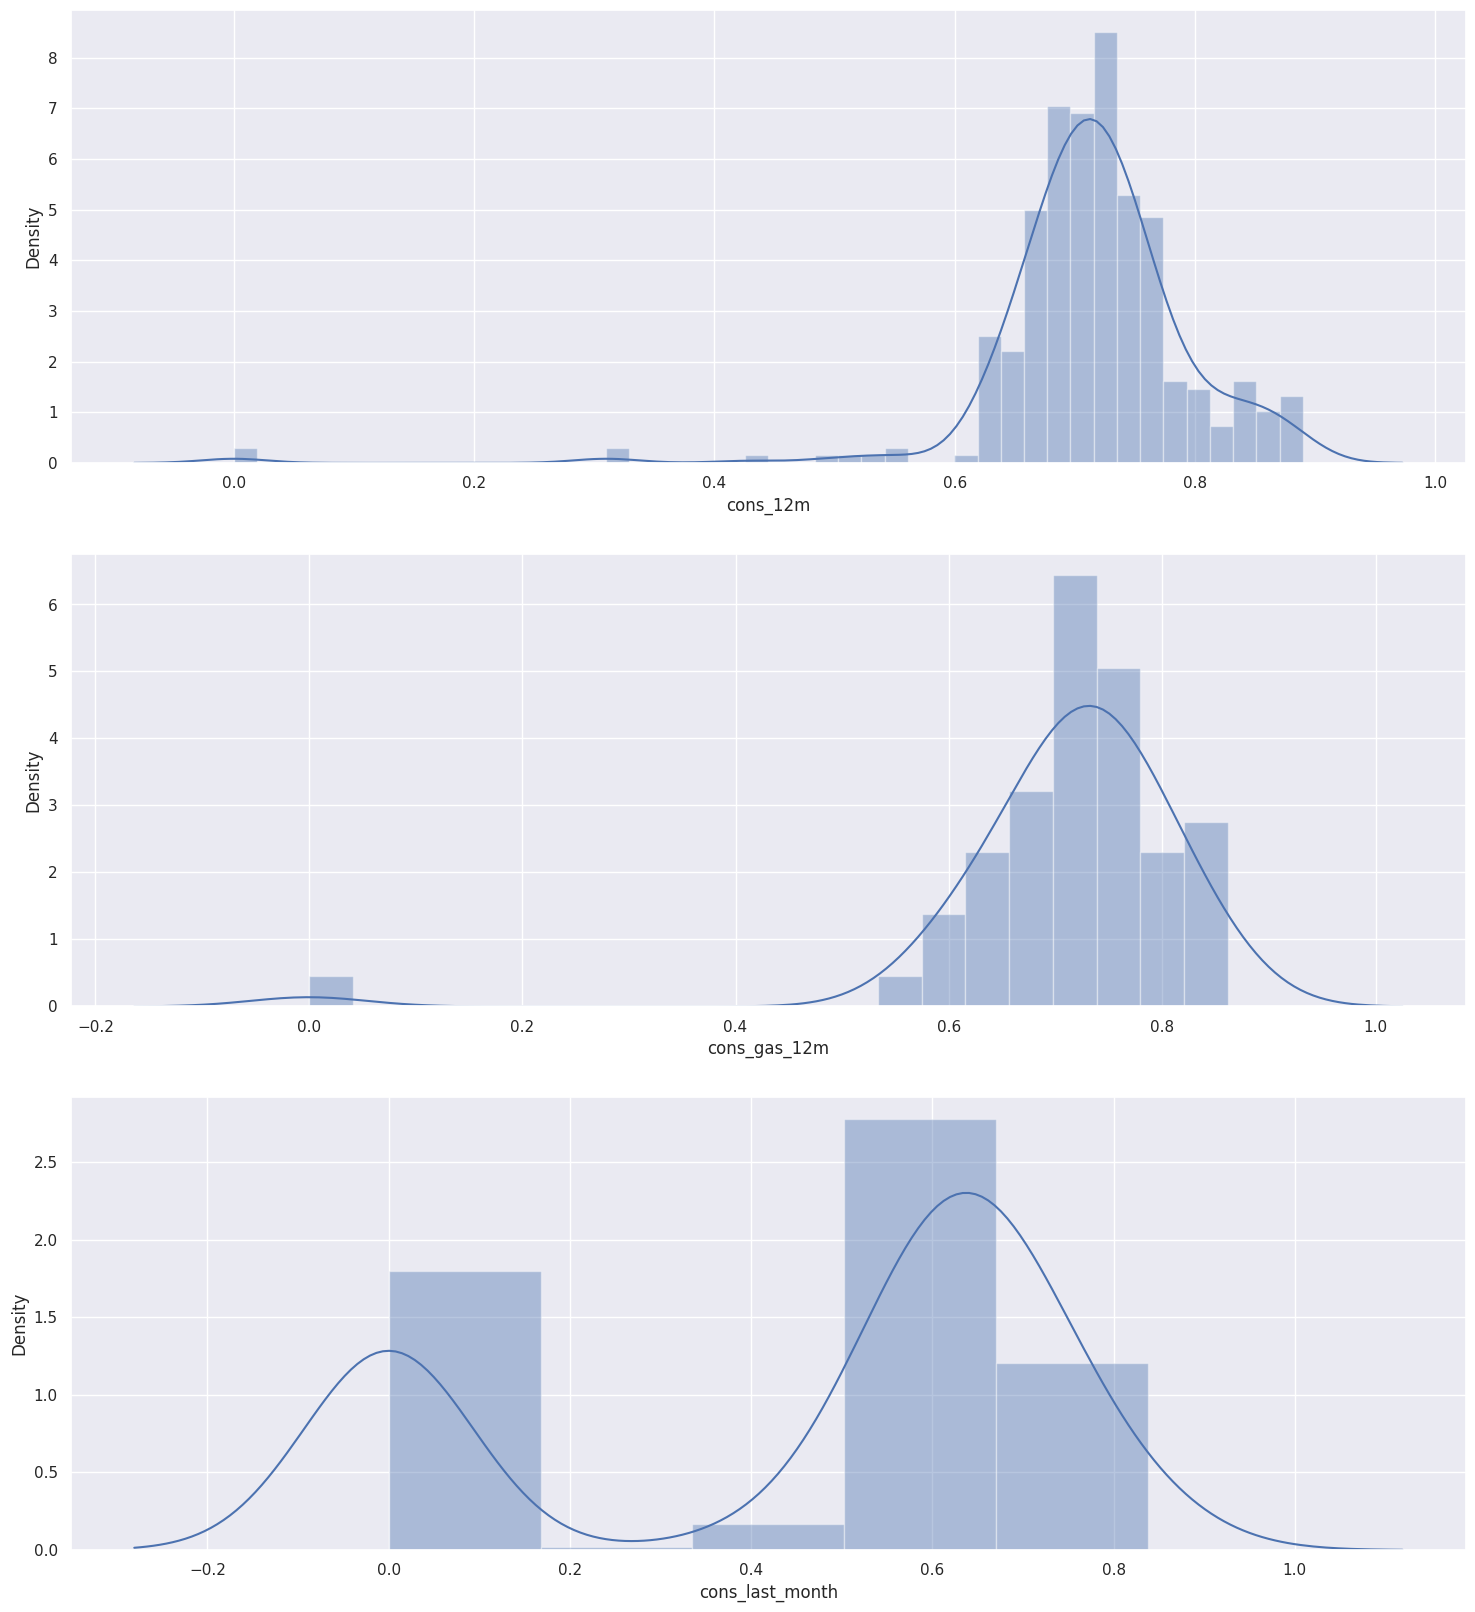

In [31]:
fig, axs = plt.subplots(nrows=3, figsize=(18, 20))
# Plot histograms
sns.distplot((df["cons_12m"].dropna()), ax=axs[0])
sns.distplot((df[df["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.distplot((df["cons_last_month"].dropna()), ax=axs[2])
plt.show()

In [32]:
# Attempt to convert relevant columns to numeric type, coercing errors to NaN
for col in df.columns:
    if df[col].dtype == 'object':  # Check if column is of object (string) type
        try:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        except:
            print(f"Conversion failed for column: {col}") # Print a message for failed conversions
            pass  # Handle exceptions if conversion fails

# Calculate correlation matrix after conversion attempt
correlation = df.select_dtypes(include=['number']).corr() # Calculate correlation only for numeric columns

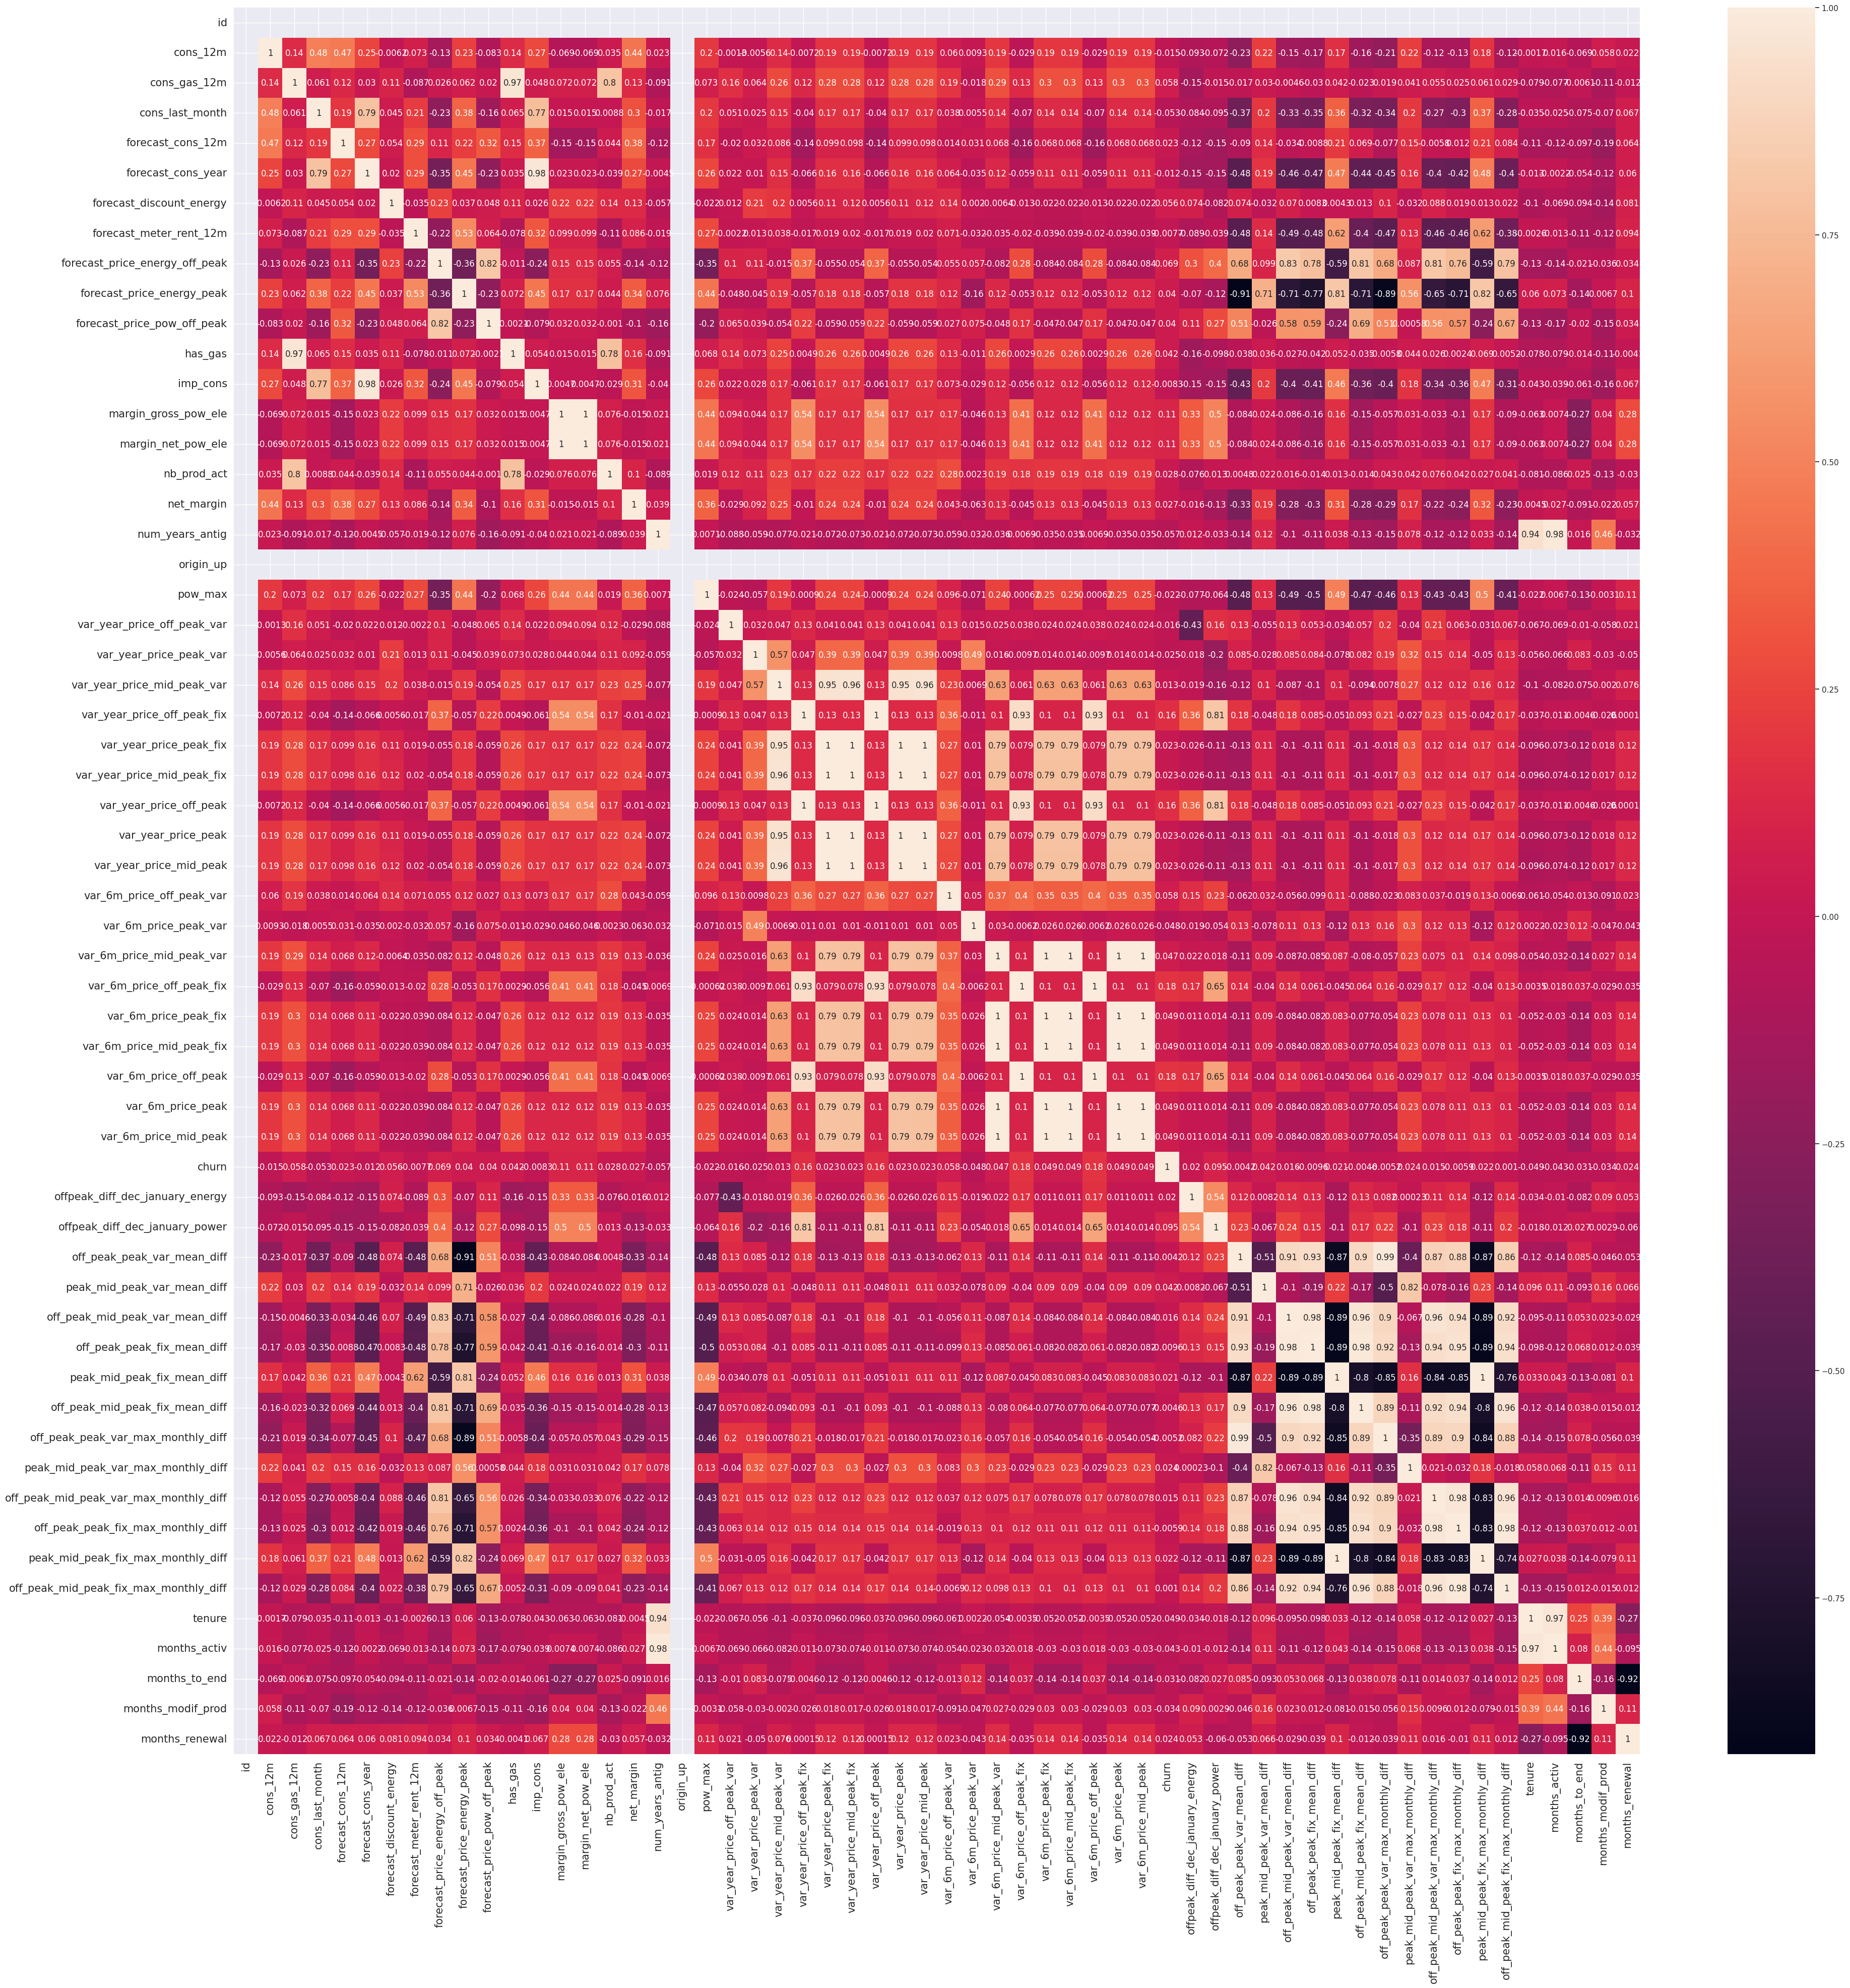

In [33]:
# Plot correlation
plt.figure(figsize=(45, 45))
sns.heatmap(
    correlation,
    xticklabels=correlation.columns.values,
    yticklabels=correlation.columns.values,
    annot=True,
    annot_kws={'size': 12}
)
# Axis ticks size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [34]:
df = df.drop(columns=['num_years_antig', 'forecast_cons_year'])
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_to_end,months_modif_prod,months_renewal,channel_MISSING,channel_epumfxlbckeskwekxbiuasklxalciiuu,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_sddiedcslfslkckwlfkdpoeeailfpeds,channel_usilxuppasemubllopkaafesmlibmsdf
0,NaN,0.739432,0.0,0.000000,0.651642,0.0,0.488046,0.112860,0.096521,40.606701,...,6,16,5,False,False,False,True,False,False,False
1,NaN,0.658440,0.0,0.545208,0.553972,0.0,0.500683,0.115237,0.100123,41.105201,...,10,60,1,False,False,False,True,False,False,False
2,NaN,0.690233,0.0,0.606573,0.594767,0.0,0.494763,0.115237,0.100123,40.939027,...,8,73,2,True,False,False,False,False,False,False
3,NaN,0.746591,0.0,0.656338,0.661713,0.0,0.494088,0.114604,0.098262,40.606701,...,2,9,8,True,False,False,False,False,False,False
4,NaN,0.695573,0.0,0.623478,0.559125,0.0,0.349966,0.142881,0.000000,46.305378,...,8,3,21,False,False,False,True,False,False,False
